In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

pd.options.display.max_columns = 999

2024-05-08 21:08:25.852199: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 21:08:25.852473: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 21:08:25.855799: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 21:08:25.891681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 21:08:26.534257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

# Loading data sample
Here a complete flight with taxi is loaded

In [2]:
flight = pd.read_csv("example_flight.csv")
flight.head()

,SYST_TRAJ_ID,FLPL_AIRC_TYPE,PLOT_DATE,FLIGHT_TIME,TIME_LAST_PLOT,ALTI_STD_FT,GRND_SPD_KT,VERT_SPD_FTMN,TRUE_AIR_SPD_KT,MASS_KG,FUEL_FLOW_KGH
0,ACPL0000,A320,2023-03-29 16:12:00,0.0,0.0,44.0,2.0,0.0,2.0,58477.143959,0.0
1,ACPL0000,A320,2023-03-29 16:12:01,1.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0
2,ACPL0000,A320,2023-03-29 16:12:02,2.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0
3,ACPL0000,A320,2023-03-29 16:12:03,3.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0
4,ACPL0000,A320,2023-03-29 16:12:04,4.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0


# Illustrating speed and altitude parameters

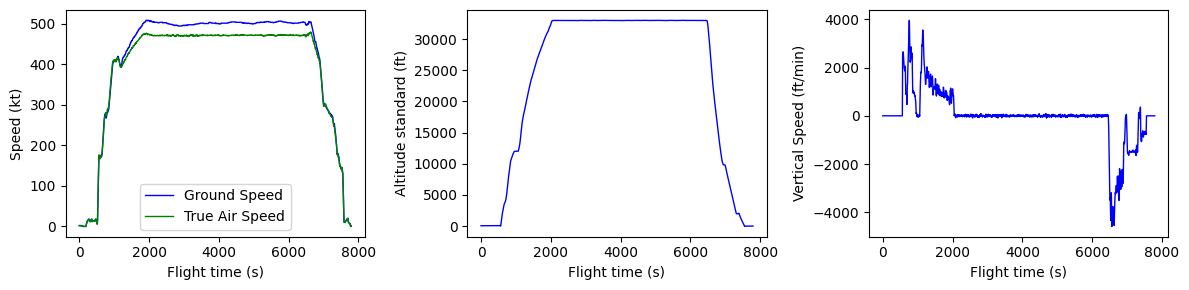

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
ax1.plot(
    flight.FLIGHT_TIME,
    flight.GRND_SPD_KT,
    color="b",
    lw=1,
    label="Ground Speed",
)

ax1.plot(
    flight.FLIGHT_TIME,
    flight.TRUE_AIR_SPD_KT,
    color="g",
    lw=1,
    label="True Air Speed",
)
ax1.legend()
ax1.set_xlabel("Flight time (s)")
ax1.set_ylabel("Speed (kt)")

ax2.plot(flight.FLIGHT_TIME, flight.ALTI_STD_FT, color="b", lw=1)
ax2.set_xlabel("Flight time (s)")
ax2.set_ylabel("Altitude standard (ft)")

ax3.plot(flight.FLIGHT_TIME, flight.VERT_SPD_FTMN, color="b", lw=1)
ax3.set_xlabel("Flight time (s)")
ax3.set_ylabel("Vertical Speed (ft/min)")

plt.tight_layout()

# Estimate fuel

In [4]:
from acropole import FuelEstimator

afe = FuelEstimator()

flight_fuel = afe.estimate(
    flight,
    typecode="FLPL_AIRC_TYPE",
    groundspeed="GRND_SPD_KT",
    altitude="ALTI_STD_FT",
    vertical_rate="VERT_SPD_FTMN",
    # optional features:
    timestamp="FLIGHT_TIME",
    airspeed="TRUE_AIR_SPD_KT",
    mass="MASS_KG",
)

2024-05-08 21:08:27.660710: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


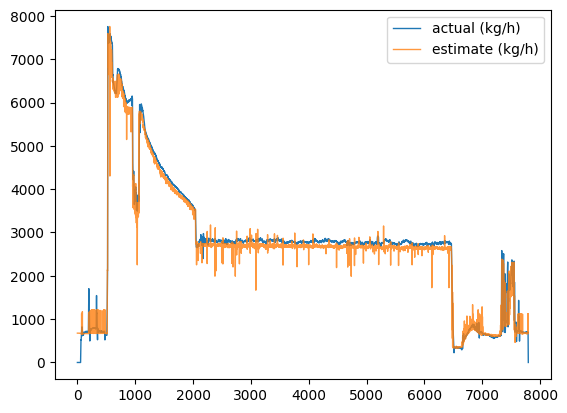

In [5]:
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.FUEL_FLOW_KGH * 2,
    lw=1,
    label="actual (kg/h)",
)
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.fuel_flow_kgh,
    alpha=0.8,
    lw=1,
    label="estimate (kg/h)",
)
plt.legend()